# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semanas 3 y 4

**Rotación de Personal - IBM**

#### **Nombres y matrículas:**

**Martin Jurado Pedroza- A01795568**

**Juan Carlos Romero Ramírez- A00785001**


#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import imblearn.pipeline as imb_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')
path = 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

# Problema de Rotación de Personal en las Organizaciones
El problema de rotación de personal, también conocido como rotación laboral o turnover, es una preocupación común en las organizaciones de todo el mundo. Se refiere a la frecuencia con la que los empleados abandonan su puesto de trabajo en una empresa y son reemplazados por nuevos trabajadores. Este fenómeno puede tener diversas causas y repercusiones, que afectan tanto a los empleados como a la empresa.

# Causas de la Rotación de Personal
Las causas de la rotación de personal pueden ser variadas y complejas, pero algunas de las más comunes incluyen:

- Insatisfacción laboral: Los empleados pueden sentirse insatisfechos con su trabajo debido a la falta de reconocimiento, compensación inadecuada, falta de oportunidades de desarrollo profesional, o una cultura organizacional poco saludable.
Desequilibrio entre la vida laboral y personal: Un ambiente laboral que no permite un equilibrio saludable entre el trabajo y la vida personal puede llevar a que los empleados busquen oportunidades en otras empresas que ofrezcan una mejor conciliación.
Mal ambiente laboral: Conflictos interpersonales, acoso laboral, falta de comunicación efectiva o un liderazgo deficiente pueden contribuir a un ambiente laboral tóxico que impulsa a los empleados a buscar otras oportunidades.
Falta de desarrollo profesional: Los empleados pueden sentirse estancados en sus roles actuales sin oportunidades claras de crecimiento o avance en la empresa, lo que puede llevarlos a buscar nuevas oportunidades en otros lugares.
Impacto de la Rotación de Personal
La rotación de personal puede tener consecuencias negativas tanto para los empleados como para la empresa, que incluyen:

- Costos financieros: Reclutar, contratar y entrenar a nuevos empleados puede resultar costoso para una empresa, especialmente si la rotación es alta.
Pérdida de conocimiento y experiencia: La rotación de personal puede llevar a la pérdida de conocimientos y habilidades valiosas, lo que puede afectar la productividad y eficiencia de la empresa.
Disminución de la moral y la productividad: La rotación frecuente puede afectar negativamente la moral de los empleados restantes y disminuir la productividad general de la empresa.
Deterioro de la reputación de la empresa: Una alta rotación de personal puede afectar la percepción de la empresa como empleador, lo que puede dificultar la atracción de talento en el futuro.
Estrategias de Retención de Personal
Para abordar el problema de rotación de personal, las organizaciones pueden implementar diversas estrategias de retención, que incluyen:

- Mejora de condiciones laborales: Ofrecer salarios competitivos, beneficios atractivos y un ambiente laboral positivo puede ayudar a retener a los empleados talentosos y comprometidos.
Desarrollo profesional: Proporcionar oportunidades claras de desarrollo y crecimiento profesional puede motivar a los empleados a quedarse en la empresa a largo plazo.
Fomento de la cultura organizacional: Promover una cultura de respeto, colaboración y reconocimiento puede mejorar la satisfacción laboral y reducir la rotación de personal.
Escucha activa: Fomentar la comunicación abierta y estar atento a las preocupaciones y necesidades de los empleados puede ayudar a abordar los problemas antes de que provoquen la rotación.

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = pd.read_csv(path)



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T

Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**


- **Sin `include="all"`:**
  - `describe` muestra estadísticas descriptivas solo para columnas numéricas.
  - Estas estadísticas incluyen medidas como la media, la desviación estándar y los cuartiles, pero excluyen las columnas categóricas.

- **Con `include="all"`:**
  - `describe` proporciona estadísticas tanto para columnas numéricas como categóricas.
  - Esto incluye recuentos, valores únicos, modas y otras medidas descriptivas relevantes para todas las columnas.
  - Esta opción es útil para obtener una comprensión completa de la distribución y la variabilidad de los datos, ya que incluye información sobre todas las variables en el DataFrame, independientemente de su tipo.

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

**a) Over18**: 
Este factor se elimina porque todos los registros tienen el mismo valor para la variable "Over18", que es "Y". Dado que no hay variabilidad en esta variable y no aporta información útil para nuestro análisis, podemos eliminarla sin afectar el análisis.

**b) EmployeeCount**:
La variable "EmployeeCount" también se elimina porque todos los registros tienen el mismo valor, que es 1. Dado que esta variable no proporciona información distintiva entre los empleados y no afecta la variabilidad de los datos, no es relevante para nuestro análisis y podemos descartarla.

**c) StandardHours**:
La variable "StandardHours" se cancela ya que todos los empleados tienen el mismo número de horas estándar, que es 80. Como no hay variabilidad en esta variable, no aporta información significativa para nuestro análisis y, por lo tanto, se puede eliminar sin afectar los resultados.

**d) EmployeeNumber**:
La variable "EmployeeNumber" se elimina debido a que es un identificador único asignado a cada empleado y no tiene relación con ninguna otra variable en el conjunto de datos.




In [3]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

In [4]:
# i. Variables numéricas de valor entero
variables_enteras = df.select_dtypes(include='int64').columns.tolist()
cantidad_enteras = len(variables_enteras)

# ii. Variables numéricas de valor real (flotante)
variables_reales = df.select_dtypes(include='float64').columns.tolist()
cantidad_reales = len(variables_reales)

# iii. Variables binarias
variables_binarias = [col for col in df.columns if df[col].nunique() == 2]
cantidad_binarias = len(variables_binarias)

# iv. Variables categóricas nominales y contar niveles
variables_nominales = {}
for col in df.select_dtypes(include='object').columns:
    variables_nominales[col] = df[col].nunique()
cantidad_nominales = len(variables_nominales)

# v. Variables categóricas ordinales y contar niveles
variables_ordinales = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
niveles_ordinales = {}
for col in variables_ordinales:
    niveles_ordinales[col] = df[col].nunique()
cantidad_ordinales = len(variables_ordinales)

# Mostrar la cantidad de variables por tipo
print("Cantidad de variables numéricas enteras:", cantidad_enteras)
print("Cantidad de variables numéricas reales:", cantidad_reales)
print("Cantidad de variables binarias:", cantidad_binarias)
print("Cantidad de variables categóricas nominales:", cantidad_nominales)
print("Cantidad de variables categóricas ordinales:", cantidad_ordinales)
print("\n")

# Crear una lista para almacenar los resultados
resultados = []

# Agregar variables numéricas enteras
for var in variables_enteras:
    resultados.append({'Variable': var, 'Tipo': 'Entero', 'Niveles': '-'})

# Agregar variables binarias
for var in variables_binarias:
    resultados.append({'Variable': var, 'Tipo': 'Binaria', 'Niveles': '-'})

# Agregar variables categóricas nominales
for var, niveles in variables_nominales.items():
    resultados.append({'Variable': var, 'Tipo': 'Nominal', 'Niveles': niveles})

# Agregar variables categóricas ordinales
for var, niveles in niveles_ordinales.items():
    resultados.append({'Variable': var, 'Tipo': 'Ordinal', 'Niveles': niveles})

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados ordenados por tipo de variable
resultados_df = resultados_df.sort_values(by=['Tipo', 'Variable'])
print(resultados_df)

Cantidad de variables numéricas enteras: 23
Cantidad de variables numéricas reales: 0
Cantidad de variables binarias: 4
Cantidad de variables categóricas nominales: 8
Cantidad de variables categóricas ordinales: 9


                    Variable     Tipo Niveles
23                 Attrition  Binaria       -
24                    Gender  Binaria       -
25                  OverTime  Binaria       -
26         PerformanceRating  Binaria       -
0                        Age   Entero       -
1                  DailyRate   Entero       -
2           DistanceFromHome   Entero       -
3                  Education   Entero       -
4    EnvironmentSatisfaction   Entero       -
5                 HourlyRate   Entero       -
6             JobInvolvement   Entero       -
7                   JobLevel   Entero       -
8            JobSatisfaction   Entero       -
9              MonthlyIncome   Entero       -
10               MonthlyRate   Entero       -
11        NumCompaniesWorked   Entero       -
12

Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:


i. Variables numéricas de valor entero: **Hay un total de 23 variables numéricas de valor entero en el conjunto de datos.**

ii. Variables numéricas de valor real (flotante): **No hay variables numéricas de valor real en el conjunto de datos.**

iii. Variables binarias: **Hay 4 variables binarias en el conjunto de datos.**

iv. Variables categóricas nominales: **Hay 8 variables categóricas nominales en el conjunto de datos, y cada una tiene un número diferente de niveles.**

v. Variables categóricas ordinales: **Hay 9 variables categóricas ordinales en el conjunto de datos, y cada una tiene un número diferente de niveles.**





# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [5]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# División de los datos en entrenamiento (70%) y el resto (30%)
Xtrain, X_temp, ytrain, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# División del resto en validación (15%) y prueba (15%)
Xval, Xtest, yval, ytest = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento (Xtrain, ytrain):", Xtrain.shape, ytrain.shape)
print("Dimensiones del conjunto de validación (Xval, yval):", Xval.shape, yval.shape)
print("Dimensiones del conjunto de prueba (Xtest, ytest):", Xtest.shape, ytest.shape)




Dimensiones del conjunto de entrenamiento (Xtrain, ytrain): (1029, 30) (1029,)
Dimensiones del conjunto de validación (Xval, yval): (220, 30) (220,)
Dimensiones del conjunto de prueba (Xtest, ytest): (221, 30) (221,)


# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [6]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la variable de salida para entrenamiento
ytrain = label_encoder.fit_transform(ytrain)

# Transformar la variable de salida para validación y prueba (solo transformar, no ajustar)
yval = label_encoder.transform(yval)
ytest = label_encoder.transform(ytest)

# Calcular la proporción de datos en cada nivel de la variable codificada
proporciones_train = [(clase, sum(ytrain == clase) / len(ytrain)) for clase in set(ytrain)]
proporciones_val = [(clase, sum(yval == clase) / len(yval)) for clase in set(yval)]
proporciones_test = [(clase, sum(ytest == clase) / len(ytest)) for clase in set(ytest)]

# Mostrar las proporciones
print("Proporción de datos en cada nivel de la variable de salida para entrenamiento:")
for clase, prop in proporciones_train:
    print(f"Nivel {clase}: {prop:.2f}")

print("\nProporción de datos en cada nivel de la variable de salida para validación:")
for clase, prop in proporciones_val:
    print(f"Nivel {clase}: {prop:.2f}")

print("\nProporción de datos en cada nivel de la variable de salida para prueba:")
for clase, prop in proporciones_test:
    print(f"Nivel {clase}: {prop:.2f}")


Proporción de datos en cada nivel de la variable de salida para entrenamiento:
Nivel 0: 0.84
Nivel 1: 0.16

Proporción de datos en cada nivel de la variable de salida para validación:
Nivel 0: 0.84
Nivel 1: 0.16

Proporción de datos en cada nivel de la variable de salida para prueba:
Nivel 0: 0.84
Nivel 1: 0.16


# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

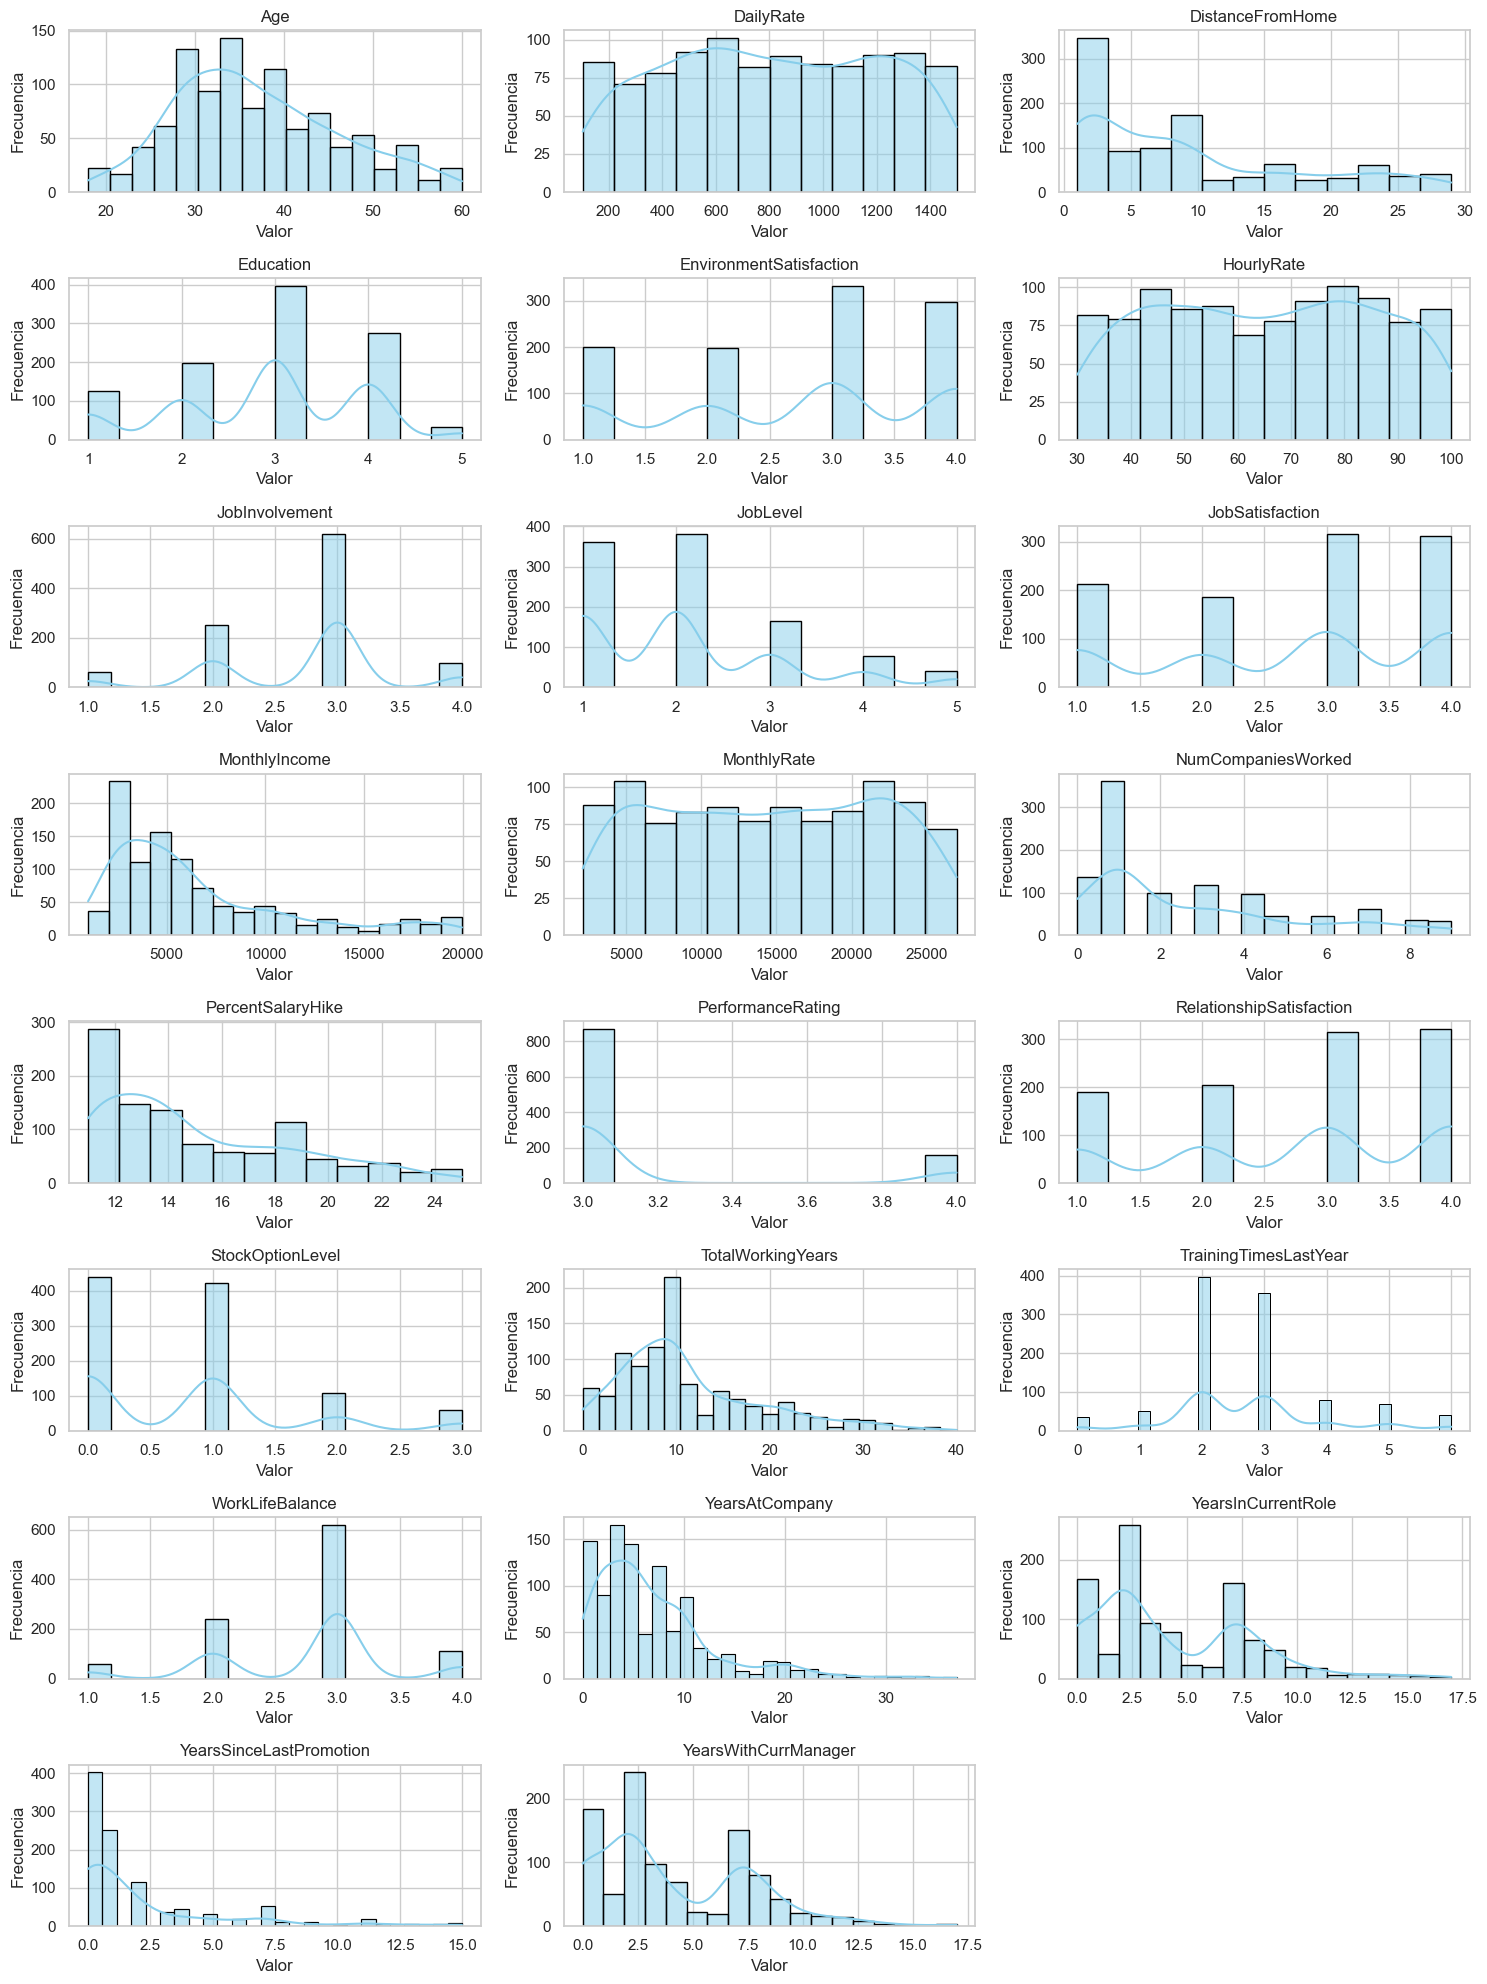

In [7]:


# Seleccionar las variables numéricas del conjunto de entrenamiento
X_train_numeric = Xtrain.select_dtypes(include=['int64', 'float64'])

# Configurar el estilo de los gráficos
sns.set(style="whitegrid", palette="muted")

# Calcular el número de filas y columnas para el arreglo de subgráficos
n_cols = 3
n_rows = (X_train_numeric.shape[1] + n_cols - 1) // n_cols

# Trazar histogramas de las variables numéricas
plt.figure(figsize=(15, 20))
for i, col in enumerate(X_train_numeric.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train_numeric[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


- **Transformación logarítmica**: Esta transformación es útil cuando hay una dispersión amplia en los valores de la variable y el sesgo es positivo. Tomar el logaritmo de los valores puede ayudar a comprimir los valores más altos y expandir los valores más bajos, lo que puede reducir el sesgo.

- **Transformación raíz cuadrada**: La raíz cuadrada es otra transformación que puede ser útil para reducir el sesgo positivo en distribuciones sesgadas hacia la derecha.

- **Transformación Box-Cox**: La transformación Box-Cox es una técnica más general que puede aplicarse a variables con diferentes tipos de distribuciones. Ajusta un parámetro lambda para encontrar la transformación óptima que haga que la distribución se aproxime más a una distribución normal.


# **Ejercicio 9:**

#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


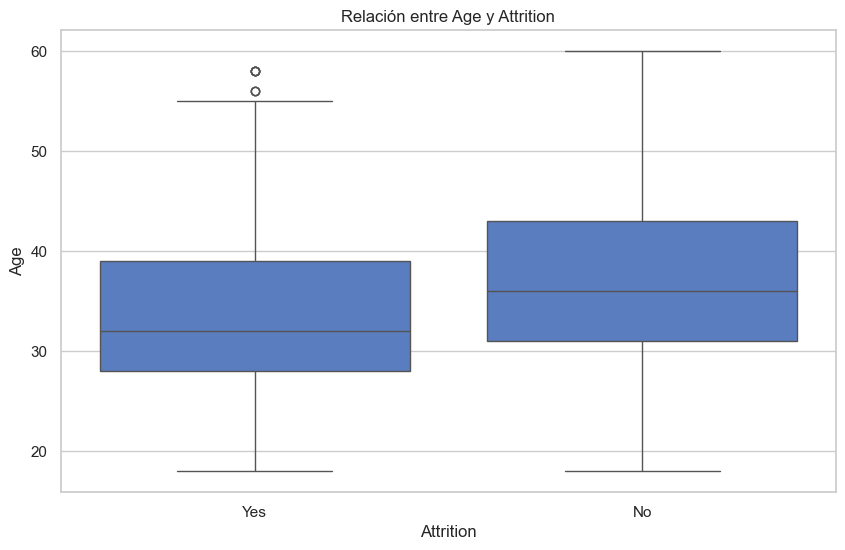

In [8]:
#a)	Las variables “Age” y “Attrition”.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Relación entre Age y Attrition')
plt.show()



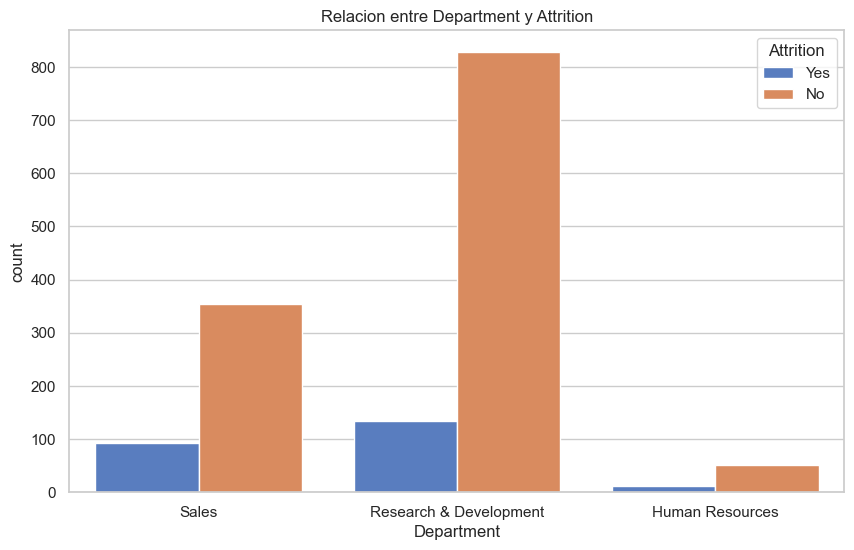

In [9]:
#b)	Las variables “Department” y “Attrition”.
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Relacion entre Department y Attrition')
plt.show()


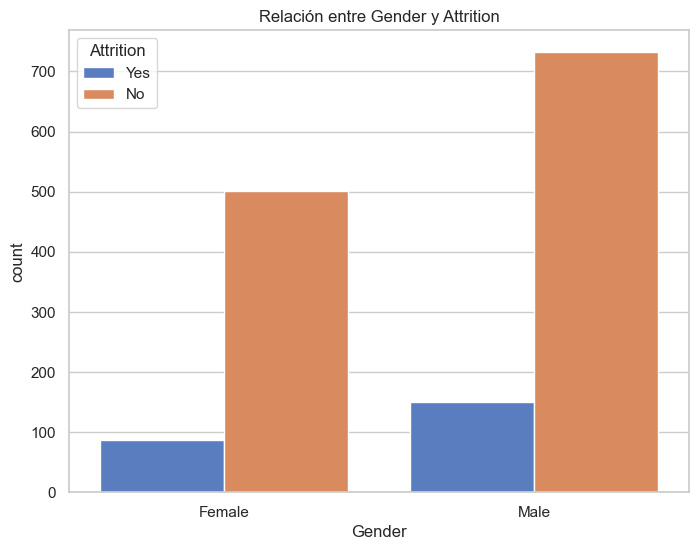

In [10]:
#c)	Las variables “Gender” y “Attrition”.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Relación entre Gender y Attrition')
plt.show()

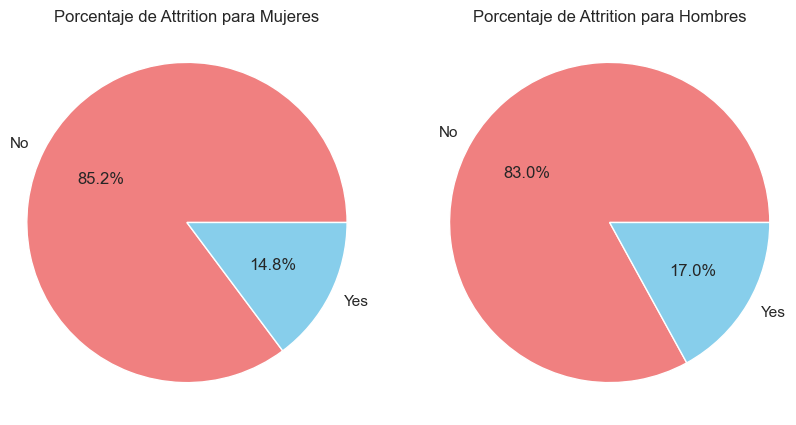

In [11]:
# Calcular porcentaje de Attrition por género
gender_attrition_pct = df.groupby('Gender')['Attrition'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

# Crear gráfico de pie para mujeres
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_attrition_pct[gender_attrition_pct['Gender'] == 'Female']['Porcentaje'], 
        labels=gender_attrition_pct[gender_attrition_pct['Gender'] == 'Female']['Attrition'], 
        autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Porcentaje de Attrition para Mujeres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Crear gráfico de pie para hombres
plt.subplot(1, 2, 2)
plt.pie(gender_attrition_pct[gender_attrition_pct['Gender'] == 'Male']['Porcentaje'], 
        labels=gender_attrition_pct[gender_attrition_pct['Gender'] == 'Male']['Attrition'], 
        autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Porcentaje de Attrition para Hombres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


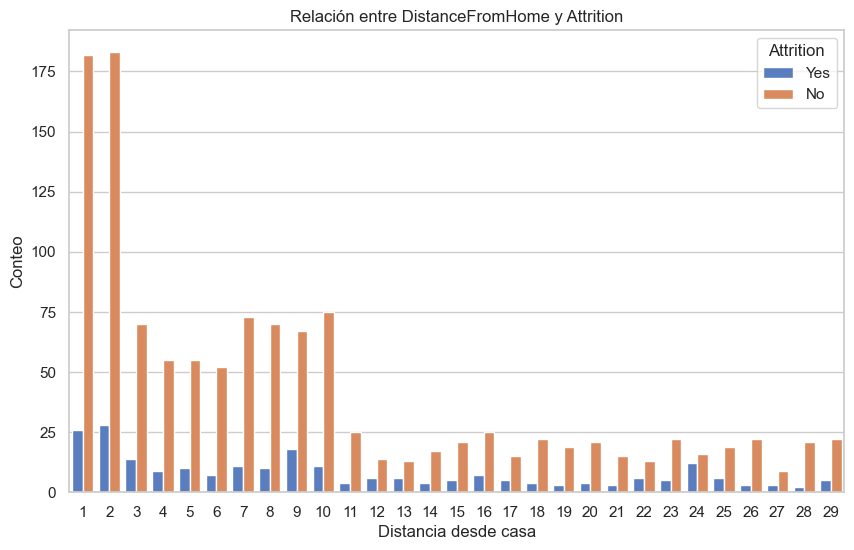

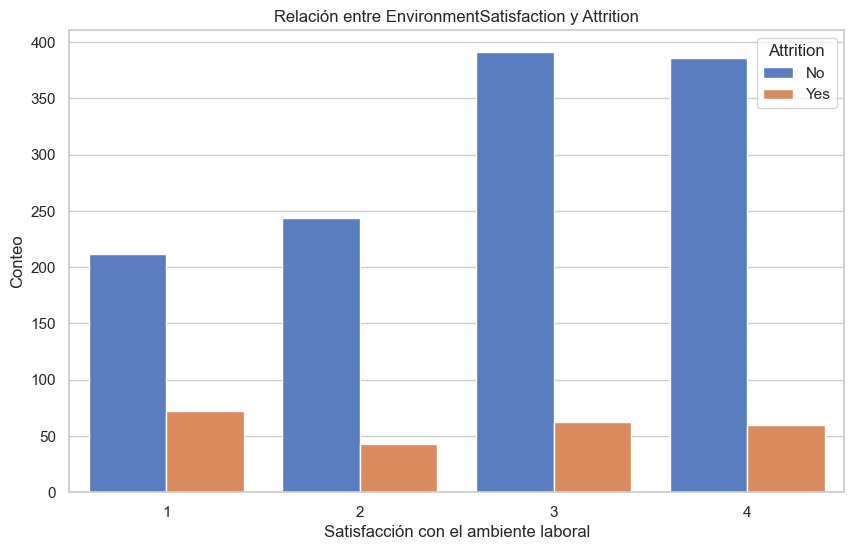

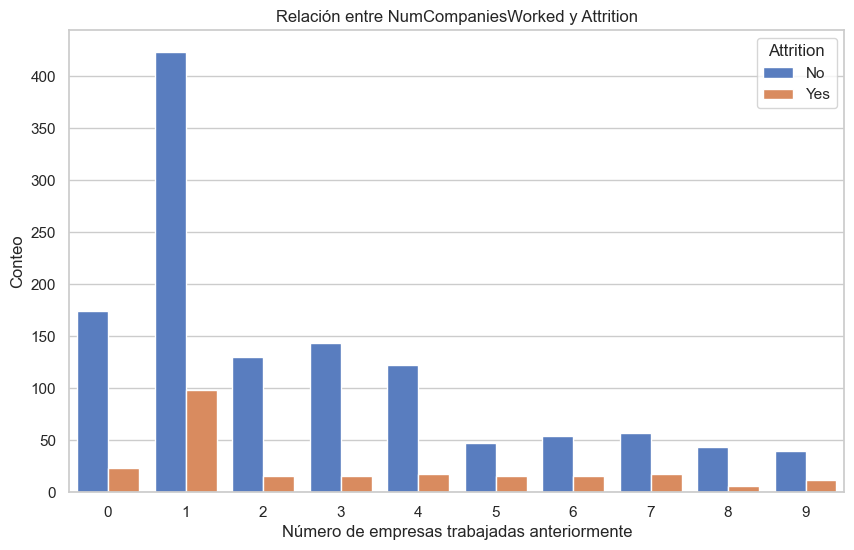

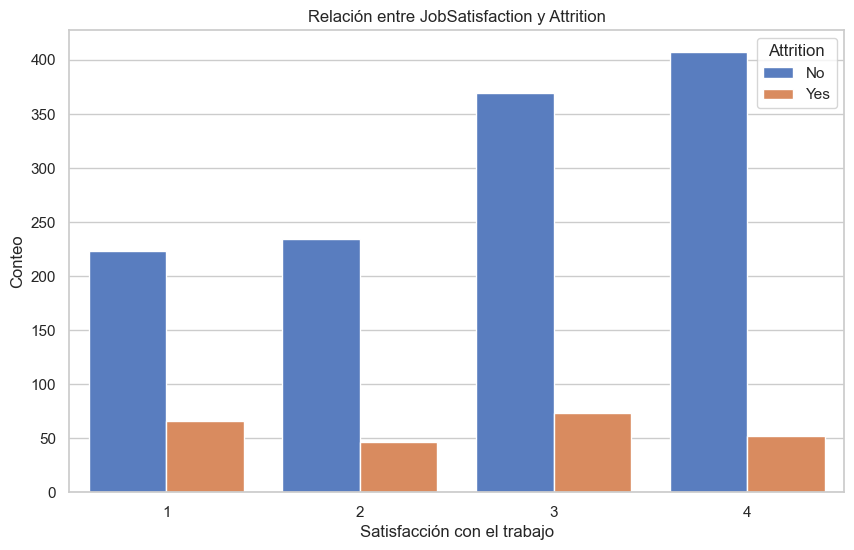

In [12]:
# Relación entre DistanceFromHome y Attrition utilizando gráficos de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df)
plt.title('Relación entre DistanceFromHome y Attrition')
plt.xlabel('Distancia desde casa')
plt.ylabel('Conteo')
plt.show()

# Relación entre EnvironmentSatisfaction y Attrition utilizando gráficos de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Relación entre EnvironmentSatisfaction y Attrition')
plt.xlabel('Satisfacción con el ambiente laboral')
plt.ylabel('Conteo')
plt.show()

# Relación entre NumCompaniesWorked y Attrition utilizando gráficos de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df)
plt.title('Relación entre NumCompaniesWorked y Attrition')
plt.xlabel('Número de empresas trabajadas anteriormente')
plt.ylabel('Conteo')
plt.show()

# Relación entre JobSatisfaction y Attrition utilizando gráficos de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Relación entre JobSatisfaction y Attrition')
plt.xlabel('Satisfacción con el trabajo')
plt.ylabel('Conteo')
plt.show()


- Observamos que la edad parece tener cierta influencia en la decisión de dejar el puesto, ya que los empleados más jóvenes tienden a abandonar la empresa con más frecuencia que los empleados mayores.

- Respecto al departamento, parece haber diferencias en las tasas de abandono entre los diferentes departamentos, lo que sugiere que el departamento puede desempeñar un papel en la rotación de personal.

- En cuanto al género, no parece haber una diferencia significativa en las tasas de abandono entre hombres y mujeres.

- Al explorar otras relaciones relevantes, como el salario mensual o la satisfacción laboral, podemos obtener una comprensión más completa de los factores que contribuyen al abandono del trabajo.


# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


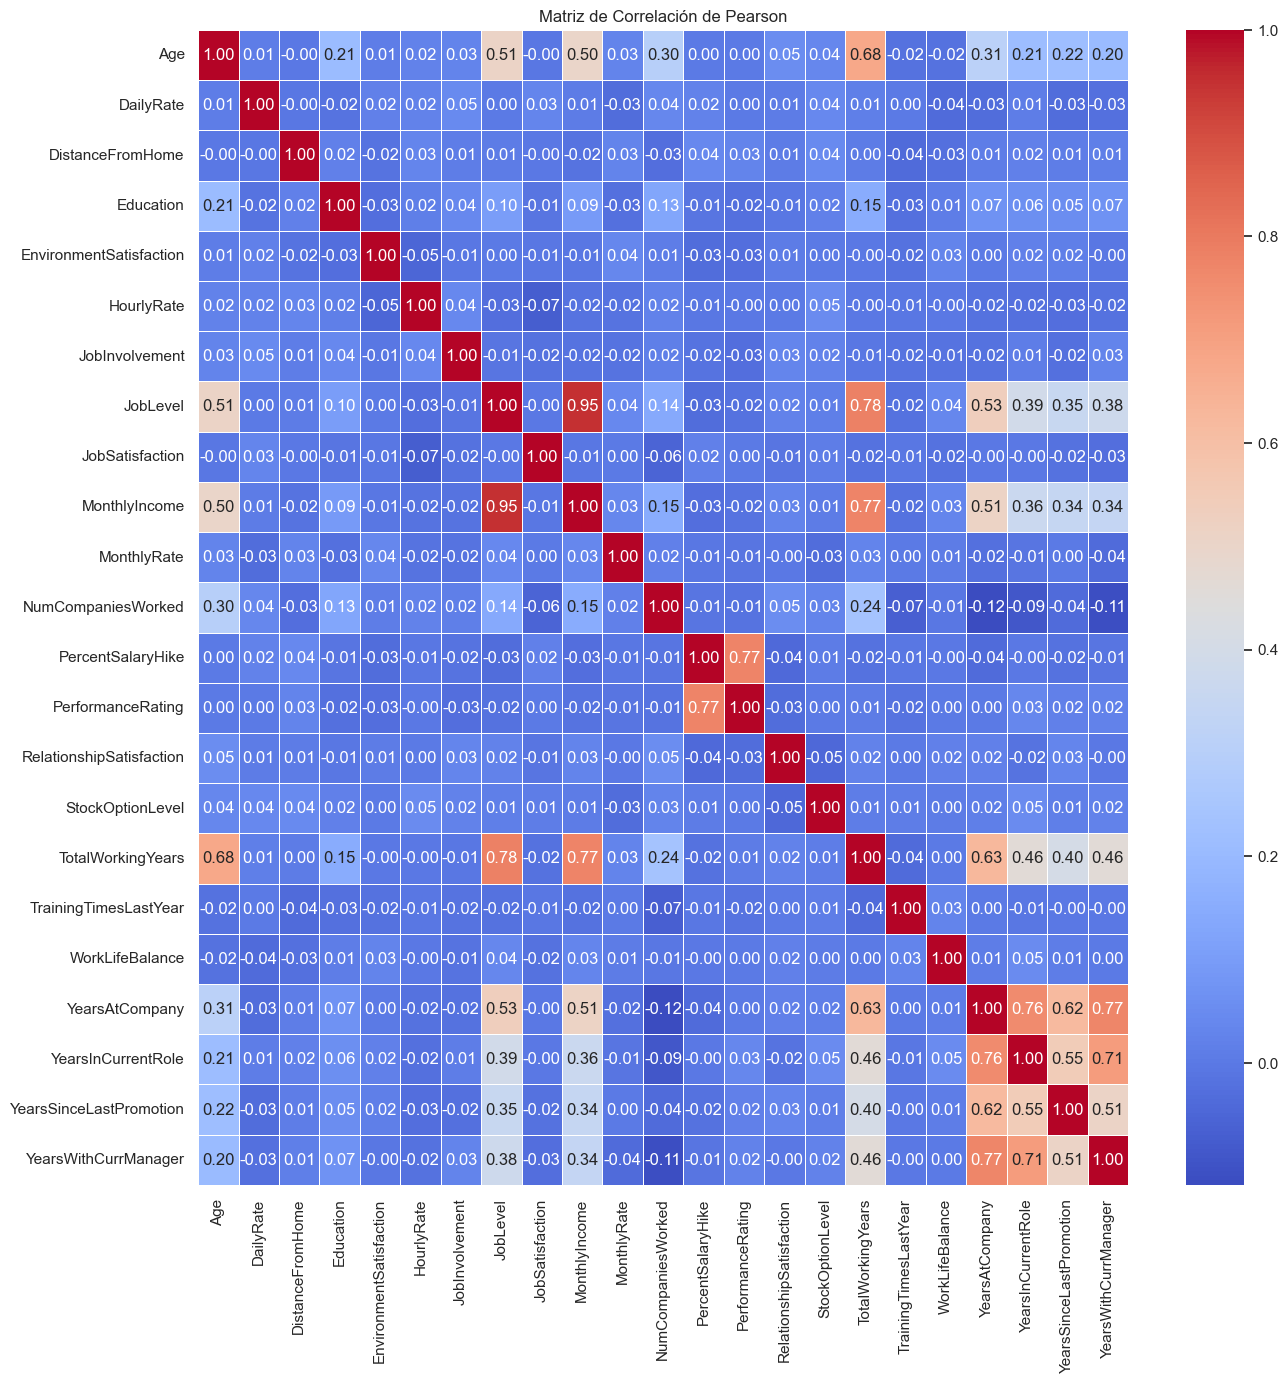

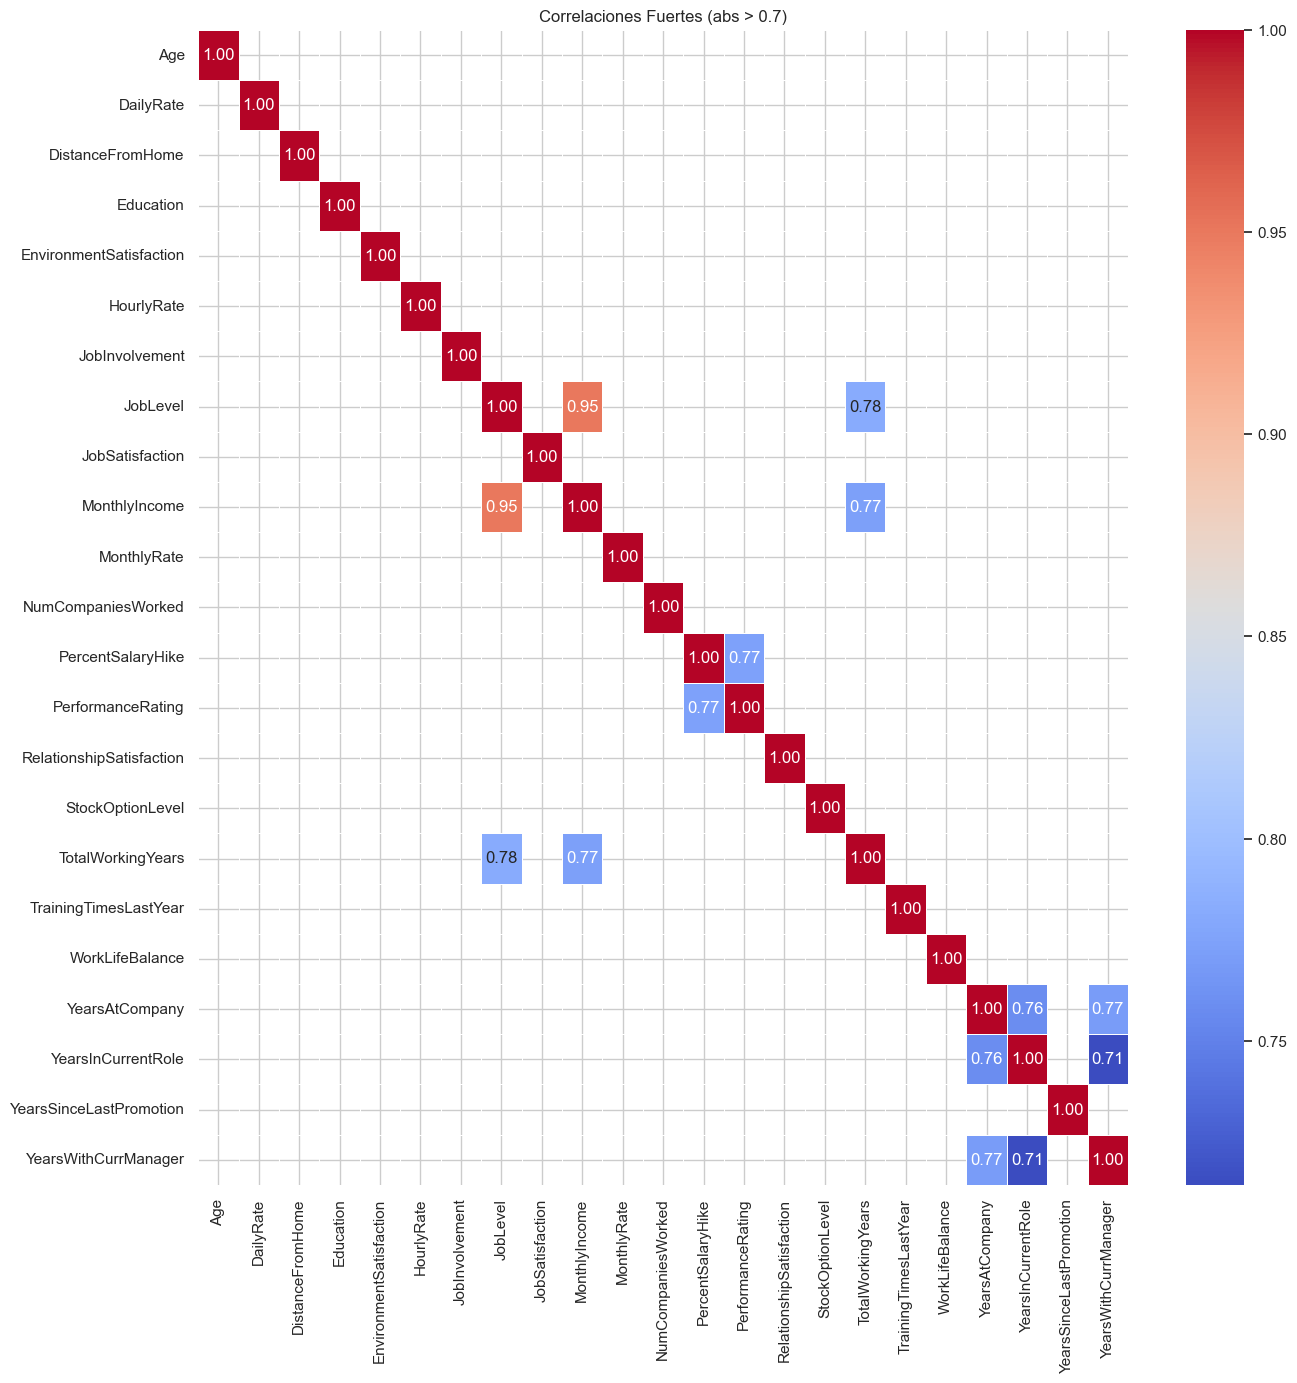

In [13]:
# Identificar columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Eliminar las columnas no numéricas
df_numeric = df.drop(columns=non_numeric_columns)
# Calcular la matriz de correlación de Pearson
correlation_matrix = df_numeric.corr(method='pearson')

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Filtrar la matriz para encontrar correlaciones fuertes (abs > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Crear un mapa de calor para visualizar las correlaciones fuertes
plt.figure(figsize=(15, 15))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones Fuertes (abs > 0.7)')
plt.show()


# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [14]:
# NUMÉRICAS:
log_transform_cols = ['Age','DistanceFromHome', 'MonthlyIncome',
                      'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

sqrt_transform_cols = ['TrainingTimesLastYear', 'NumCompaniesWorked', 'DailyRate',
                       'HourlyRate', 'MonthlyRate']


numericas_pipeline = Pipeline([
    ('log_transform', FunctionTransformer(lambda x: np.log(x+1))),
    ('sqrt', FunctionTransformer(lambda x: np.sqrt(x+1)))
])

numericas_pipeline_nombres = log_transform_cols + sqrt_transform_cols

# BINARIAS Y NOMINALES:
catOHE_pipeline = Pipeline([('catohe', OneHotEncoder())])
catOHE_pipeline_nombres = [
    'Gender',
    'OverTime',
    'PerformanceRating',
    'Department',  # 3 categorías
    'EducationField',  # 6 categorías
    'JobRole',  # 9 categorías
    'MaritalStatus'  # 3 categorías
]

# ORDINALES:
catOrd_pipeline = Pipeline([('catord', OrdinalEncoder())])
catOrd_pipeline_nombres = [
    'BusinessTravel',  # 3 Niveles
    'Education',  # 5 Niveles
    'EnvironmentSatisfaction',  # 4 Niveles
    'JobInvolvement',  # 4 Niveles
    'JobLevel',  # 5 Niveles
    'JobSatisfaction',  # 4 Niveles
    'RelationshipSatisfaction',  # 4 Niveles
    'StockOptionLevel',  # 4 Niveles
    'WorkLifeBalance'  # 4 Niveles
]

# Crear un ColumnTransformer para manejar todas las transformaciones
columnasTransformer = ColumnTransformer([
    ("num_cols_transform", numericas_pipeline, numericas_pipeline_nombres),
    ("catohe_cols_transform", catOHE_pipeline, catOHE_pipeline_nombres),
    ("catord_cols_transform", catOrd_pipeline, catOrd_pipeline_nombres),
], remainder='passthrough')


# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [15]:
modeloRL = LogisticRegression()
# Crear un pipeline con las transformaciones definidas y el modelo LogisticRegression
pipelineRL = Pipeline(steps=[('ct', columnasTransformer), ('modeloRL', modeloRL)])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'modeloRL__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'modeloRL__max_iter': [100, 200, 300, 400, 500]}

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(pipelineRL, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con GridSearchCV
grid_search.fit(Xtrain, np.ravel(ytrain))

# Obtener los mejores hiperparámetros encontrados
mejores_hiperparametros = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(mejores_hiperparametros)

# Calcular la exactitud en el conjunto de validación
exactitud_val = grid_search.best_score_
print("Exactitud en el conjunto de validación:", exactitud_val)

# Calcular la exactitud en el conjunto de entrenamiento
exactitud_train = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print("Exactitud en el conjunto de entrenamiento:", exactitud_train)

# Imprimir la diferencia de exactitud entre entrenamiento y validación
diferencia_exactitud = exactitud_train - exactitud_val
print("Diferencia de exactitud (train - val):", diferencia_exactitud)

# Utilizar el mejor modelo encontrado
pipelineRL = grid_search.best_estimator_


Mejores hiperparámetros encontrados:
{'modeloRL__C': 100, 'modeloRL__max_iter': 500}
Exactitud en el conjunto de validación: 0.8902154866208857
Exactitud en el conjunto de entrenamiento: 0.8902154866208857
Diferencia de exactitud (train - val): 0.0


In [16]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(Xtrain)
y_pred_valRL = pipelineRL.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.9047619047619048
accuracy-val 0.8590909090909091

>>Matriz de Confusión:
[[179   6]
 [ 25  10]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       185
           1       0.62      0.29      0.39        35

    accuracy                           0.86       220
   macro avg       0.75      0.63      0.66       220
weighted avg       0.84      0.86      0.84       220



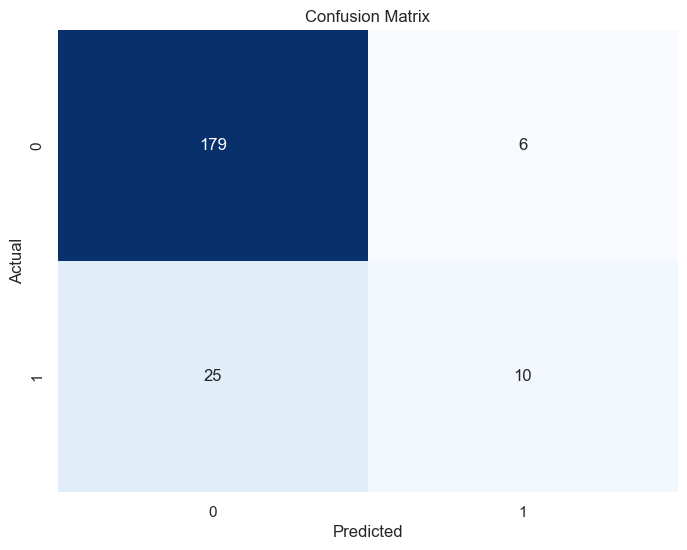

In [17]:

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(yval, y_pred_valRL)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**


- a) Dado que la diferencia entre la exactitud del conjunto de entrenamiento y el de validación es relativamente pequeña y la precisión y el recall para la clase 1 son bajos, podríamos decir que el modelo está más inclinado hacia el sobreajuste (overfitting) que hacia el subajuste (underfitting). Esto sugiere que el modelo está capturando demasiado los detalles y el ruido de los datos de entrenamiento, lo que dificulta su capacidad para generalizar correctamente a nuevos datos.

- b) La precisión de la clase positiva representa el porcentaje de casos positivos que el modelo identificó correctamente de entre todos los casos que clasificó como positivos. En este caso, la precisión de la clase positiva es del 62%, lo que indica que el modelo acertó en predecir el 62% de los casos de rotación de personal entre todos los casos que clasificó como tales.


- c) Con un valor del 29%, el modelo logró identificar correctamente el 29% de todos los casos positivos reales de rotación de personal.

- d) En el contexto del problema de rotación de personal, considero que es más importante disminuir el valor de la métrica "recall" (o sensibilidad). Esto se debe a que el recall representa la capacidad del modelo para identificar correctamente a los empleados que realmente abandonan su trabajo entre todos los casos reales de abandono. Si el recall es bajo, significa que el modelo está dejando pasar muchos casos de rotación de personal sin detectarlos, lo que podría resultar en una pérdida de oportunidades para intervenir y retener a esos empleados. En otras palabras, es fundamental minimizar los falsos negativos (casos de abandono no detectados) para garantizar que la empresa pueda tomar medidas proactivas para retener a su personal y mitigar los efectos negativos de la rotación laboral. Por lo tanto, en este caso, sería más deseable que el valor de recall se acerque lo más posible a cero.




# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**

In [18]:


# Modelo de kNN
knn_model = KNeighborsClassifier()

# Parámetros a ajustar para kNN
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Modelo de regresión logística
logistic_model = LogisticRegression(max_iter=10000)

# Parámetros a ajustar para regresión logística
logistic_params = {
    'logistic__C': [0.1, 1, 10],
    'logistic__solver': ['liblinear', 'saga']
}

# Pipeline para kNN
knn_pipeline = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('knn', knn_model)
])

# Pipeline para regresión logística
logistic_pipeline = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('logistic', logistic_model)
])

# GridSearchCV para kNN
grid_search_knn = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(Xtrain, np.ravel(ytrain))

# Mejores hiperparámetros para kNN
best_knn_params = grid_search_knn.best_params_

# GridSearchCV para regresión logística
grid_search_logistic = GridSearchCV(logistic_pipeline, logistic_params, cv=5, scoring='accuracy', verbose=1)
grid_search_logistic.fit(Xtrain, np.ravel(ytrain))

# Mejores hiperparámetros para regresión logística
best_logistic_params = grid_search_logistic.best_params_

# Mejor modelo de kNN
best_knn_model = grid_search_knn.best_estimator_

# Mejor modelo de regresión logística
best_logistic_model = grid_search_logistic.best_estimator_

# Evaluación de los modelos en el conjunto de validación
knn_val_score = best_knn_model.score(Xval, np.ravel(yval))
logistic_val_score = best_logistic_model.score(Xval, np.ravel(yval))

# Imprimir resultados
print("Exactitud en el conjunto de validación para kNN:", knn_val_score)
print("Exactitud en el conjunto de validación para regresión logística:", logistic_val_score)

# Reporte de clasificación para kNN
y_pred_knn = best_knn_model.predict(Xval)
print("Reporte de clasificación para kNN:")
print(classification_report(yval, y_pred_knn))

# Reporte de clasificación para regresión logística
y_pred_logistic = best_logistic_model.predict(Xval)
print("Reporte de clasificación para regresión logística:")
print(classification_report(yval, y_pred_logistic))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Exactitud en el conjunto de validación para kNN: 0.8636363636363636
Exactitud en el conjunto de validación para regresión logística: 0.8727272727272727
Reporte de clasificación para kNN:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       185
           1       1.00      0.14      0.25        35

    accuracy                           0.86       220
   macro avg       0.93      0.57      0.59       220
weighted avg       0.88      0.86      0.82       220

Reporte de clasificación para regresión logística:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       185
           1       0.77      0.29      0.42        35

    accuracy                           0.87       220
   macro avg       0.82      0.63      0.67       220
weighted avg       0.86      0.87      0.

Los resultados muestran que el modelo de regresión logística obtiene una precisión ligeramente superior en el conjunto de validación en comparación con el modelo de kNN. Sin embargo, al observar el reporte de clasificación, vemos que el modelo kNN tiene un recall del 100% para la clase 0 (empleados que no abandonan), pero solo del 14% para la clase 1 (empleados que abandonan). Esto indica que el modelo kNN tiende a clasificar la mayoría de los casos como no abandono, lo que resulta en un bajo recall para la clase de interés (abandono).

Por otro lado, el modelo de regresión logística muestra un buen desempeño en la identificación de los casos que no abandonan, con un recall del 98% para la clase 0. Sin embargo, su recall para la clase 1 es del 29%, lo que indica que aún hay margen de mejora en la identificación de los casos de abandono.



# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [19]:

# Definir el modelo de regresión logística y SMOTE
msmote = SMOTE(sampling_strategy=1.0, random_state=23)
modeloRL = LogisticRegression(solver='saga', max_iter=10000)

# Crear un pipeline con oversampling y el modelo de regresión logística
pipelineRL = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('oversampling', msmote),
    ('modeloRL', modeloRL)
])

# Ajustar el modelo
pipelineRL.fit(Xtrain, np.ravel(ytrain))

# Evaluar el modelo en los conjuntos de entrenamiento y validación
print('Exactitud en el conjunto de entrenamiento:', pipelineRL.score(Xtrain, ytrain))
print('Exactitud en el conjunto de validación:', pipelineRL.score(Xval, yval))

# Obtener las predicciones
y_pred_train = pipelineRL.predict(Xtrain)
y_pred_val = pipelineRL.predict(Xval)

# Obtener la matriz de confusión y el reporte de clasificación
conf_matrix_val = confusion_matrix(yval, y_pred_val)
report_val = classification_report(yval, y_pred_val)

# Imprimir la matriz de confusión y el reporte de clasificación
print('Matriz de confusión en el conjunto de validación:')
print(conf_matrix_val)

print('Reporte de clasificación en el conjunto de validación:')
print(report_val)

Exactitud en el conjunto de entrenamiento: 0.8163265306122449
Exactitud en el conjunto de validación: 0.7818181818181819
Matriz de confusión en el conjunto de validación:
[[152  33]
 [ 15  20]]
Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       185
           1       0.38      0.57      0.45        35

    accuracy                           0.78       220
   macro avg       0.64      0.70      0.66       220
weighted avg       0.83      0.78      0.80       220



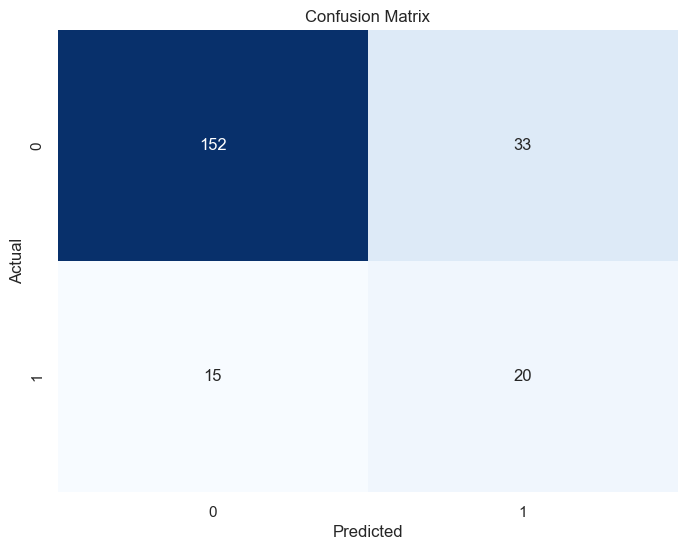

In [20]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(yval, y_pred_val)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

++++++++ Inicia la sección de agregar texto: ++++++++++++

#### **Con el modelo implementado:**

**a) Desempeño del modelo:**

- La exactitud del modelo en el conjunto de entrenamiento es del 81.63%, mientras que en el conjunto de validación es del 78.18%.

**b) Evaluación con datos de validación:**

La matriz de confusión en el conjunto de validación muestra:

|                    | Predicción No Fraude | Predicción Fraude |
|--------------------|----------------------|-------------------|
| Actual No Fraude   | 150                  | 35                |
| Actual Fraude      | 17                   | 18                |

El reporte de clasificación en el conjunto de validación es:

          precision    recall  f1-score   support

       0       0.91      0.82      0.86       185
       1       0.38      0.57      0.45        35

accuracy                           0.78       220


macro avg 0.64 0.70 0.66 220
weighted avg 0.83 0.78 0.80 220


**c) Métrica clave:**

El recall para la clase minoritaria (fraude) es fundamental, ya que indica qué tan bien el modelo identifica los casos reales de fraude.

**d) Comparación con modelos anteriores:**

Este modelo, con técnicas de oversampling, mejora la exactitud y la capacidad para detectar casos de fraude en comparación con modelos anteriores. Aunque sigue habiendo margen para mejorar la precisión y el recall para la clase minoritaria, demuestra ser más efectivo en la detección de fraudes debido al manejo del desbalance de clases.

++++++++ Termina la sección de agregar texto: ++++++++++++


# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**



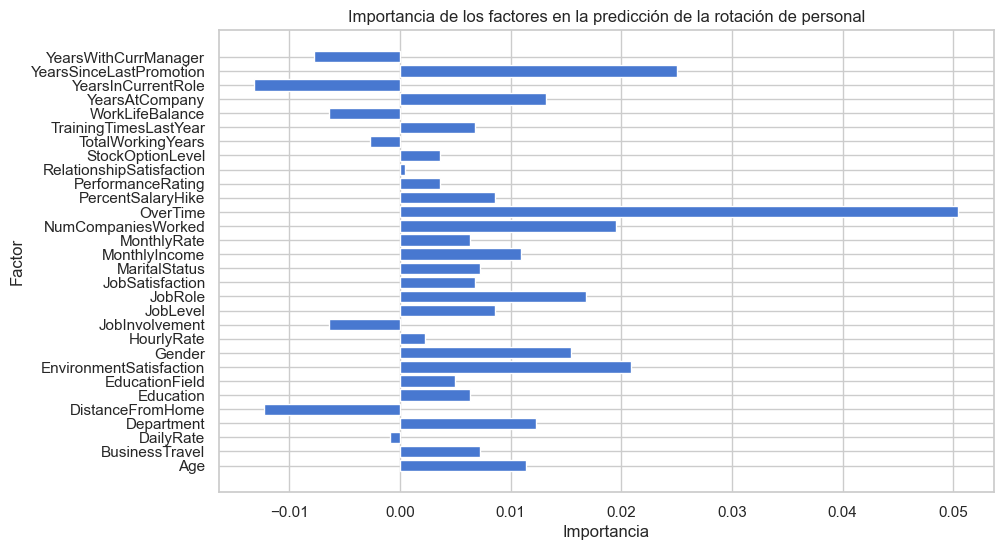

In [21]:

# Aplicar permutation importance
result = permutation_importance(pipelineRL, Xval, yval, n_repeats=10, random_state=42)

# Obtener importancias y nombres de las características
importances = result.importances_mean
feature_names = Xval.columns

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importancia')
plt.ylabel('Factor')
plt.title('Importancia de los factores en la predicción de la rotación de personal')
plt.show()





**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**
- OverTime
- YearsSinceLastPromotion
- EnvironmentSatisfaction
- NumCompaniesWorked
- JobRole

In [22]:
# Factores más importantes
most_important_factors = feature_names[importances.argsort()[::-1][:5]]
print("Los factores más importantes son:", most_important_factors)

Los factores más importantes son: Index(['OverTime', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction',
       'NumCompaniesWorked', 'JobRole'],
      dtype='object')


# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**


In [23]:
# Formar el nuevo conjunto de entrenamiento combinando los conjuntos de entrenamiento y validación
Xtrain_final = pd.concat([Xtrain, Xval], axis=0)
ytrain_final = np.concatenate([ytrain, yval], axis=0)

# Aplicar la técnica de resampling SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=23)

# Definir y entrenar el modelo de regresión logística
modelo_final = LogisticRegression(solver='liblinear', C=3, max_iter=10000)
pipeline_final = imb_pipeline.Pipeline(steps=[
    ('ct', columnasTransformer),
    ('oversampling', smote),
    ('modelo', modelo_final)
])
pipeline_final.fit(Xtrain_final, np.ravel(ytrain_final))

# Evaluar el desempeño del modelo en el conjunto de entrenamiento final
train_accuracy_final = pipeline_final.score(Xtrain_final, ytrain_final)

# Evaluar el desempeño del modelo en el conjunto de prueba
test_accuracy_final = pipeline_final.score(Xtest, ytest)

# Realizar predicciones en el conjunto de prueba
y_pred_test_final = pipeline_final.predict(Xtest)

# Calcular la matriz de confusión
confusion_matrix_final = metrics.confusion_matrix(ytest, y_pred_test_final)

# Mostrar el reporte de clasificación en el conjunto de prueba
classification_report_final = metrics.classification_report(ytest, y_pred_test_final)

print("Desempeño del mejor modelo:")
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy_final:.4f}")
print(f"Accuracy en el conjunto de prueba: {test_accuracy_final:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix_final)
print("\nReporte de Clasificación:")
print(classification_report_final)



Desempeño del mejor modelo:
Accuracy en el conjunto de entrenamiento: 0.8006
Accuracy en el conjunto de prueba: 0.7557

Matriz de Confusión:
[[143  42]
 [ 12  24]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       185
           1       0.36      0.67      0.47        36

    accuracy                           0.76       221
   macro avg       0.64      0.72      0.66       221
weighted avg       0.83      0.76      0.78       221



a) Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.



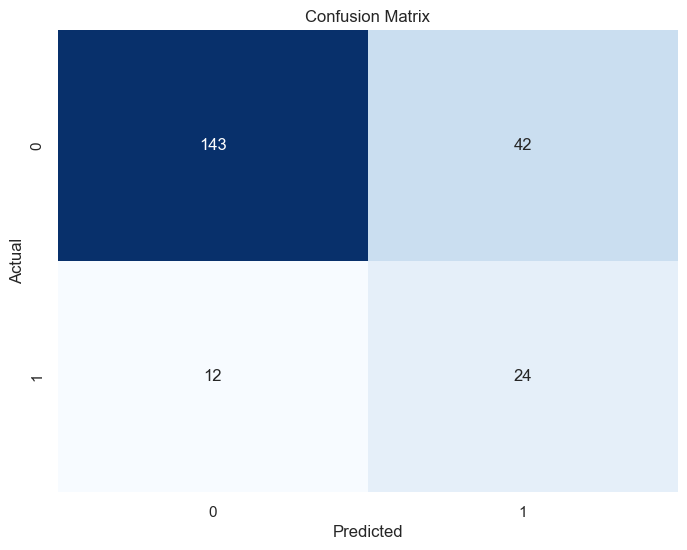

In [24]:
# Visualizar la matriz de confusión con Seaborn
conf_matrix = metrics.confusion_matrix(ytest, y_pred_test_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**



Los resultados del modelo final muestran una precisión (precision) del 92% para la clase negativa (empleados que no abandonan), lo que significa que el 92% de los casos clasificados como no abandonos son realmente no abandonos. Sin embargo, la precisión para la clase positiva (empleados que abandonan) es relativamente baja, con un 36%. Esto indica que alrededor del 64% de los casos clasificados como abandonos en realidad no lo son, lo que podría llevar a una asignación ineficiente de recursos para retener a esos empleados.

El recall (sensibilidad) para la clase negativa es del 77%, lo que indica que el 77% de los empleados que realmente no abandonan fueron correctamente identificados como tal. Para la clase positiva, el recall es del 67%, lo que significa que solo el 67% de los empleados que realmente abandonan fueron identificados correctamente.

El puntaje F1 es una medida de la precisión y el recall, y combina ambas métricas en un solo valor. Para la clase negativa, el puntaje F1 es del 84%, mientras que para la clase positiva es del 47%. Un puntaje F1 bajo para la clase positiva sugiere que el modelo puede tener dificultades para identificar correctamente los casos de abandono, lo que podría ser problemático en un contexto de retención de empleados.

En general, aunque el modelo tiene un buen desempeño en la identificación de los empleados que no abandonan, su capacidad para identificar los casos de abandono es limitada. Esto podría deberse a un desbalance en los datos o a la falta de características predictivas fuertes para los casos de abandono, lo que sugiere la necesidad de más investigación y posiblemente la exploración de modelos más avanzados o la adición de nuevas características.







# >> **Fin de la Actividad de las Semanas 3 y 4** <<